DONE!!
1
DONE!!
2
DONE!!
3
DONE!!
4
DONE!!
5
DONE!!
6
DONE!!
7
DONE!!
8
DONE!!
9
DONE!!
10
DONE!!
11
DONE!!
12
DONE!!
13
DONE!!
14
DONE!!
15
DONE!!
16
DONE!!
17
DONE!!
18
DONE!!
19
DONE!!
20
DONE!!
21
DONE!!
22
DONE!!
23
DONE!!
24
DONE!!
25
Optimal policy: [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Optimal Actions:
[1, 3, 2, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
Iterations taken for convergence:  25


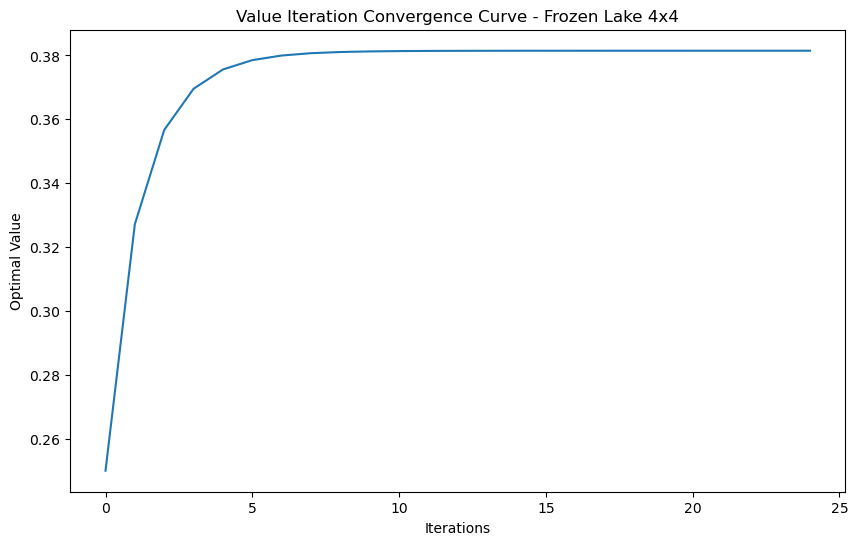

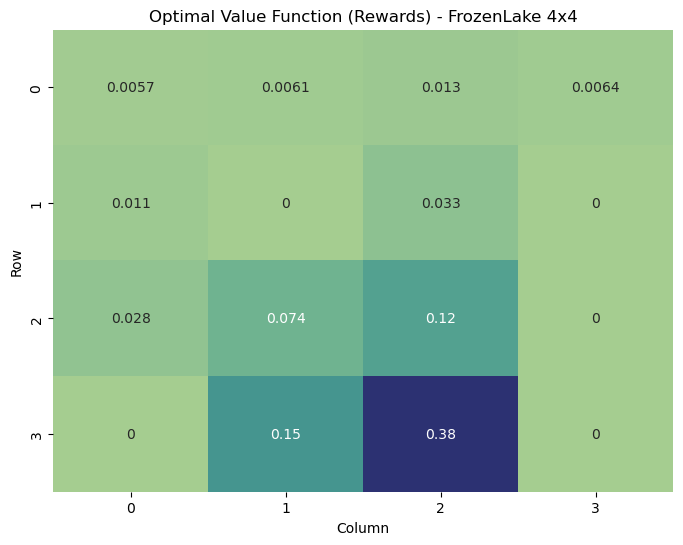

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gym

# Create FrozenLake environment
env = gym.make('FrozenLake-v1', is_slippery=True)
num_states = env.observation_space.n
num_actions = env.action_space.n
def compute_q_values(state, V):
    q_values = np.zeros(num_actions)
    for action in range(num_actions):
        for prob, next_state, reward, done in env.P[state][action]:
            q_values[action] += prob * (reward + 0.99 * V[next_state] * (1 - done))
    return q_values
# Value iteration function
def value_iteration(env, gamma=0.99, epsilon=1e-6, max_iterations=10000):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    V = np.zeros(num_states)  # Initialize value function to zeros
    rewards = []
    iterations = 0
    goal_reached = 0  # Counter for number of times goal is reached
    while True:
        delta = 0
        for state in range(num_states):
            v = V[state]
            q_values = np.zeros(num_actions)
            for action in range(num_actions):
                for _, next_state, reward, done in env.env.P[state][action]:
                    q_values[action] += (1/num_actions) * (reward + gamma * V[next_state])
            V[state] = np.max(q_values)
            delta = max(delta, np.abs(v - V[state]))
        rewards.append(np.max(V))
        iterations += 1
        if done:
            print("DONE!!")
            print(iterations)
        if delta < epsilon or iterations > max_iterations:
            break

    policy = np.zeros((num_states, num_actions))  # Initialize policy with zeros
    for state in range(num_states):
        q_values = compute_q_values(state, V)
        optimal_action = np.argmax(q_values)
        policy[state, optimal_action] = 1
    # Count number of times goal is reached
    # for episode in range(100):  # Number of episodes for evaluation
    #     state = env.reset()
    #     while True:
    #         action = np.argmax([np.sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.env.P[state][a]]) for a in range(num_actions)])
    #         state, reward, done, _ = env.step(action)
    #         if done:
    #             if state == 15:  # Goal state
    #                 goal_reached += 1
    #             break
    print("Optimal policy:", policy)

    print("Optimal Actions:")
    optimal_actions = []
    for state in range(env.observation_space.n):
        optimal_action = np.argmax(policy[state])
        optimal_actions.append(optimal_action)
    print(optimal_actions)
    return V, rewards, iterations, goal_reached

# Run value iteration
V_optimal, rewards, iterations, goal_reached = value_iteration(env)

# Print convergence information
print("Iterations taken for convergence: ", iterations)
# print("Number of times goal was reached: ", goal_reached)


# Plot convergence curve
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Optimal Value')
plt.title('Value Iteration Convergence Curve - Frozen Lake 4x4')
plt.show()

# Plot rewards heatmap
V_optimal = np.reshape(V_optimal, (4, 4))
plt.figure(figsize=(8, 6))
sns.heatmap(V_optimal, annot=True, cmap='crest', cbar=False)
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Optimal Value Function (Rewards) - FrozenLake 4x4')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Generate a random map for the FrozenLake environment
random_map = generate_random_map(size=16, p=0.7)

# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)

# Value iteration function
def value_iteration(env, gamma=0.99, epsilon=1e-8, max_iterations=10000):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    V = np.zeros(num_states)  # Initialize value function to zeros
    rewards = []
    iterations = 0
    goal_reached = 0  # Counter for number of times goal is reached
    while True:
        delta = 0
        for state in range(num_states):
            v = V[state]
            q_values = np.zeros(num_actions)
            for action in range(num_actions):
                for _, next_state, reward, done in env.env.P[state][action]:
                    q_values[action] += (1/num_actions) * (reward + gamma * V[next_state])
            V[state] = np.max(q_values)
            delta = max(delta, np.abs(v - V[state]))
        rewards.append(np.max(V))
        iterations += 1
        if done:
            print("DONE!!")
            print(iterations)
        if delta < epsilon or iterations > max_iterations:
            break
    # Count number of times goal is reached
    # for episode in range(100):  # Number of episodes for evaluation
    #     state = env.reset()
    #     while True:
    #         action = np.argmax([np.sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.env.P[state][a]]) for a in range(num_actions)])
    #         state, reward, done, _ = env.step(action)
    #         if done:
    #             if state == 15:  # Goal state
    #                 goal_reached += 1
    #             break
    return V, rewards, iterations, goal_reached

# Run value iteration
V_optimal, rewards, iterations, goal_reached = value_iteration(env)

# Print convergence information
print("Iterations taken for convergence: ", iterations)
# print("Number of times goal was reached: ", goal_reached)

# Plot convergence curve
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Optimal Value')
plt.title('Value Iteration Convergence Curve - Frozen Lake 16x16')
plt.show()

# Plot rewards heatmap
V_optimal = np.reshape(V_optimal, (16, 16))
plt.figure(figsize=(16, 6))
sns.heatmap(V_optimal, annot=True, cmap='crest', cbar=False)
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Optimal Value Function (Rewards) - Frozen Lake 16x16')
plt.show()

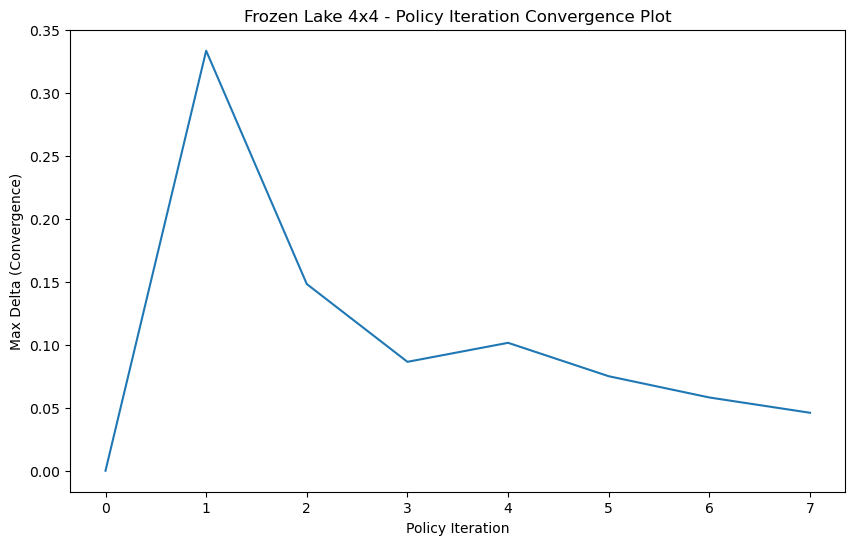

Learned Policy: [2 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
Number of Iterations: 8


NameError: name 'rewards_heatmap' is not defined

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

import seaborn as sns


# Create the FrozenLake environment
env = gym.make('FrozenLake-v1', is_slippery=True)
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize the value function and policy
V = np.zeros(num_states)
policy = np.zeros(num_states, dtype=int)

# Lists to store rewards and deltas for plotting
rewards = []
deltas = []
policy_iterations = 0


# Policy iteration loop
while True:
    # Policy evaluation: compute the value function given the current policy
    policy_iterations += 1
    delta = 0
    for s in range(num_states):
        v = V[s]
        action = policy[s]
        state_values = []
        for p, next_state, reward, done in env.P[s][action]:
            state_values.append(p * (reward + V[next_state]))
        V[s] = np.sum(state_values)
        delta = max(delta, abs(v - V[s]))
    deltas.append(delta)

    # Policy improvement: update the policy based on the current value function
    policy_stable = True
    for s in range(num_states):
        old_action = policy[s]
        action_values = []
        for a in range(num_actions):
            state_values = []
            for p, next_state, reward, done in env.P[s][a]:
                state_values.append(p * (reward + V[next_state]))
            action_values.append(np.sum(state_values))
        policy[s] = np.argmax(action_values)
        if old_action != policy[s]:
            policy_stable = False

    # Store the total rewards of the current policy for plotting
    total_rewards = 0
    for episode in range(100):  # Evaluate policy for 100 episodes
        state = env.reset()
        state = state[0]
        done = False
        while not done:
            action = policy[state]
            state, reward, done, truncated, _ = env.step(action)
            total_rewards += reward
    rewards.append(total_rewards)

    if policy_stable:
        break

# Plot rewards heatmap
# rewards_heatmap = np.array(rewards).reshape(len(rewards) // 10, 10)
# plt.figure(figsize=(10, 6))
# plt.imshow(rewards_heatmap, cmap='hot', interpolation='nearest')
# plt.colorbar(label='Total Rewards')
# plt.xlabel('Policy Iteration Iteration (x10)')
# plt.ylabel('Number of Episodes')
# plt.title('Policy Iteration Rewards Heatmap')
# plt.show()

# Plot convergence plot
plt.figure(figsize=(10, 6))
plt.plot(deltas)
plt.xlabel('Policy Iteration')
plt.ylabel('Max Delta (Convergence)')
plt.title('Frozen Lake 4x4 - Policy Iteration Convergence Plot')
plt.show()

# Print the learned policy
print("Learned Policy:", policy)
print("Number of Iterations:", policy_iterations)

# Plot rewards heatmap
# rewards_heatmap = np.zeros((4, 4))  # Assumes FrozenLake is of size 4x4
# for s in range(16):  # 16 states in FrozenLake
#     row = s // 4
#     col = s % 4
#     print(row,col)
#     action = np.argmax(policy[s])  # Optimal action for state s
#     rewards_heatmap[row, col] = rewards[s]  # Reward for optimal action at state s

# Plot the rewards heatmap using Seaborn
# sns.heatmap(rewards_heatmap, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5)
# plt.title("Rewards Heatmap for Policy Iteration (FrozenLake)")
# plt.xlabel("Column")
# plt.ylabel("Row")
# plt.xticks(np.arange(4) + 0.5, labels=["A", "B", "C", "D"])
# plt.yticks(np.arange(4) + 0.5, labels=["1", "2", "3", "4"])
# plt.show()

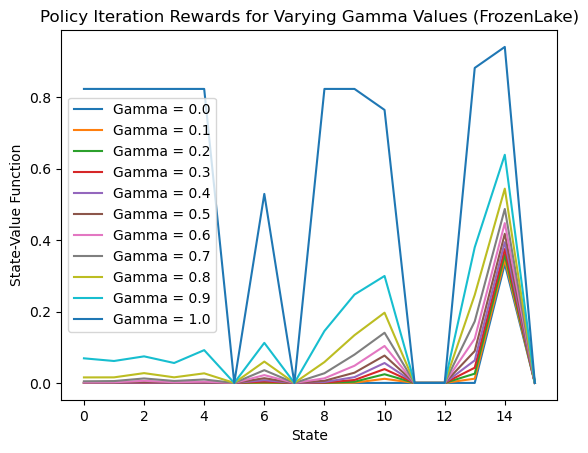

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gym

# Create the FrozenLake environment with is_slippery=True
env = gym.make('FrozenLake-v1', is_slippery=True)

# Policy Iteration function
def policy_iteration(env, gamma=0.99, theta=1e-6):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    policy = np.ones((num_states, num_actions)) / num_actions  # Initialize policy with uniform probabilities
    V = np.zeros(num_states)  # Initialize state-value function with zeros

    def compute_q_values(state):
        q_values = np.zeros(num_actions)
        for action in range(num_actions):
            for prob, next_state, reward, done in env.P[state][action]:
                q_values[action] += prob * (reward + gamma * V[next_state] * (1 - done))
        return q_values

    def improve_policy():
        policy_stable = True
        for state in range(num_states):
            old_action = np.argmax(policy[state])
            q_values = compute_q_values(state)
            new_action = np.argmax(q_values)
            if old_action != new_action:
                policy_stable = False
            policy[state] = np.eye(num_actions)[new_action]
        return policy_stable

    num_iterations = 0
    while True:
        num_iterations += 1
        while True:
            delta = 0
            for state in range(num_states):
                old_v = V[state]
                q_values = compute_q_values(state)
                V[state] = np.max(q_values)
                delta = max(delta, np.abs(old_v - V[state]))
            if delta < theta:
                break

        policy_stable = improve_policy()
        if policy_stable:
            break

    return policy, V, num_iterations

# Varying gamma values
gamma_values = np.arange(0, 1.1, 0.1)
rewards = []
for gamma in gamma_values:
    _, state_values, _ = policy_iteration(env, gamma=gamma)
    rewards.append(state_values)

# Plot rewards for varying gamma values
for i in range(len(gamma_values)):
    plt.plot(range(env.observation_space.n), rewards[i], label="Gamma = {:.1f}".format(gamma_values[i]))
plt.xlabel('State')
plt.ylabel('State-Value Function')
plt.title('Policy Iteration Rewards for Varying Gamma Values (FrozenLake)')
plt.legend()
plt.show()


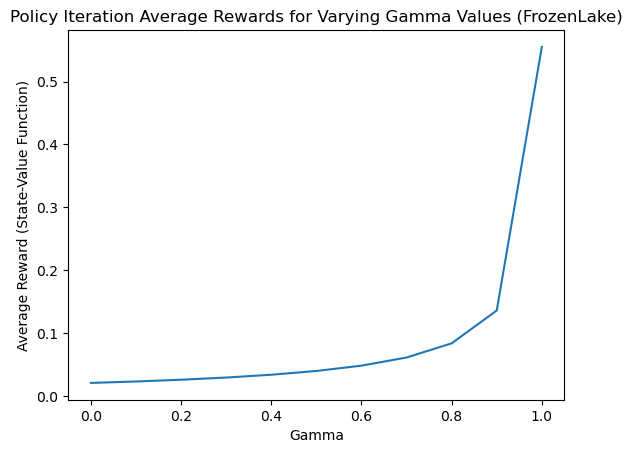

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gym

# Create the FrozenLake environment with is_slippery=True
env = gym.make('FrozenLake-v1', is_slippery=True)

# Policy Iteration function
def policy_iteration(env, gamma=0.99, theta=1e-6):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    policy = np.ones((num_states, num_actions)) / num_actions  # Initialize policy with uniform probabilities
    V = np.zeros(num_states)  # Initialize state-value function with zeros

    def compute_q_values(state):
        q_values = np.zeros(num_actions)
        for action in range(num_actions):
            for prob, next_state, reward, done in env.P[state][action]:
                q_values[action] += prob * (reward + gamma * V[next_state] * (1 - done))
        return q_values

    def improve_policy():
        policy_stable = True
        for state in range(num_states):
            old_action = np.argmax(policy[state])
            q_values = compute_q_values(state)
            new_action = np.argmax(q_values)
            if old_action != new_action:
                policy_stable = False
            policy[state] = np.eye(num_actions)[new_action]
        return policy_stable

    num_iterations = 0
    while True:
        num_iterations += 1
        while True:
            delta = 0
            for state in range(num_states):
                old_v = V[state]
                q_values = compute_q_values(state)
                V[state] = np.max(q_values)
                delta = max(delta, np.abs(old_v - V[state]))
            if delta < theta:
                break

        policy_stable = improve_policy()
        if policy_stable:
            break

    return policy, V, num_iterations

# Varying gamma values
gamma_values = np.arange(0, 1.1, 0.1)
average_rewards = []
for gamma in gamma_values:
    _, state_values, _ = policy_iteration(env, gamma=gamma)
    average_rewards.append(np.mean(state_values))  # Calculate the average reward

# Plot average rewards for varying gamma values
plt.plot(gamma_values, average_rewards)
plt.xlabel('Gamma')
plt.ylabel('Average Reward (State-Value Function)')
plt.title('Policy Iteration Average Rewards for Varying Gamma Values (FrozenLake)')
plt.show()


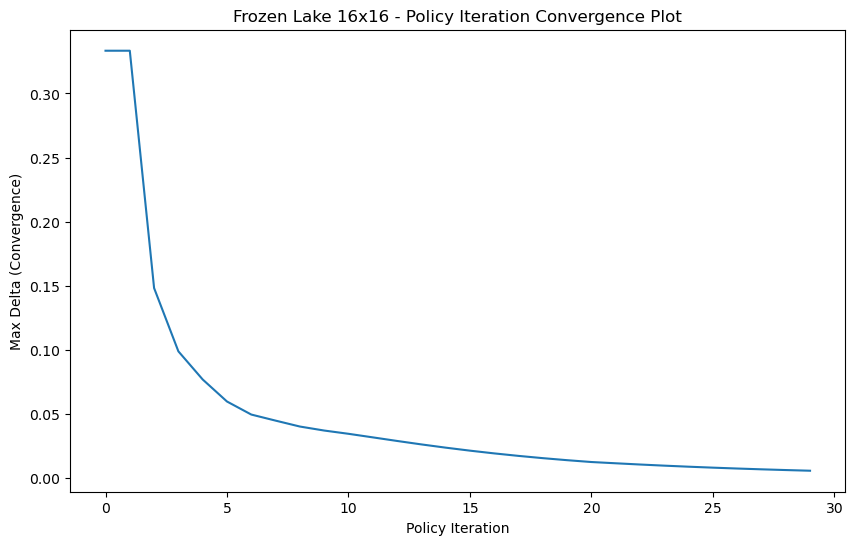

Learned Policy: [0 0 2 2 0 0 0 0 2 2 0 0 2 2 2 2 0 0 0 2 3 1 1 0 0 2 0 0 0 2 1 1 0 0 1 0 0
 2 1 0 0 2 0 0 1 2 1 1 1 1 3 2 1 1 1 0 0 0 2 0 0 2 2 1 1 0 0 2 2 1 1 1 1 0
 0 2 0 0 2 1 1 1 0 0 2 2 1 1 3 3 0 0 2 1 1 1 1 2 1 1 2 3 2 0 0 0 2 0 0 2 1
 3 3 3 2 3 0 0 2 1 1 1 1 1 1 1 0 0 0 0 0 0 2 1 2 1 0 0 2 3 3 3 3 1 0 0 0 1
 0 0 2 2 0 0 0 0 2 0 0 0 1 0 0 2 1 1 3 3 2 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 2
 2 0 0 0 1 2 1 1 2 2 1 0 0 1 0 0 2 0 0 0 0 2 2 3 3 2 1 1 1 2 1 1 0 0 1 1 1
 3 2 0 0 2 2 0 0 2 2 3 3 0 0 0 0 0 2 0 0 2 2 2 1 2 0 0 0 2 1 1 1 1 0]
Number of Iterations: 30


In [9]:
import numpy as np
import gym
import matplotlib.pyplot as plt

import seaborn as sns
from gym.envs.toy_text.frozen_lake import generate_random_map


# Create the FrozenLake environment
random_map = generate_random_map(size=16, p=0.7)

# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)

num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize the value function and policy
V = np.zeros(num_states)
policy = np.zeros(num_states, dtype=int)

# Lists to store rewards and deltas for plotting
rewards = []
deltas = []
policy_iterations = 0


# Policy iteration loop
while True:
    # Policy evaluation: compute the value function given the current policy
    policy_iterations += 1
    delta = 0
    for s in range(num_states):
        v = V[s]
        action = policy[s]
        state_values = []
        for p, next_state, reward, done in env.P[s][action]:
            state_values.append(p * (reward + V[next_state]))
        V[s] = np.sum(state_values)
        delta = max(delta, abs(v - V[s]))
    deltas.append(delta)

    # Policy improvement: update the policy based on the current value function
    policy_stable = True
    for s in range(num_states):
        old_action = policy[s]
        action_values = []
        for a in range(num_actions):
            state_values = []
            for p, next_state, reward, done in env.P[s][a]:
                state_values.append(p * (reward + V[next_state]))
            action_values.append(np.sum(state_values))
        policy[s] = np.argmax(action_values)
        if old_action != policy[s]:
            policy_stable = False

    # Store the total rewards of the current policy for plotting
    total_rewards = 0
    for episode in range(100):  # Evaluate policy for 100 episodes
        state = env.reset()
        state = state[0]
        done = False
        while not done:
            action = policy[state]
            state, reward, done, truncated, _ = env.step(action)
            total_rewards += reward
    rewards.append(total_rewards)

    if policy_stable:
        break

# Plot rewards heatmap
# rewards_heatmap = np.array(rewards).reshape(len(rewards) // 10, 10)
# plt.figure(figsize=(10, 6))
# plt.imshow(rewards_heatmap, cmap='hot', interpolation='nearest')
# plt.colorbar(label='Total Rewards')
# plt.xlabel('Policy Iteration Iteration (x10)')
# plt.ylabel('Number of Episodes')
# plt.title('Policy Iteration Rewards Heatmap')
# plt.show()

# Plot convergence plot
plt.figure(figsize=(10, 6))
plt.plot(deltas)
plt.xlabel('Policy Iteration')
plt.ylabel('Max Delta (Convergence)')
plt.title('Frozen Lake 16x16 - Policy Iteration Convergence Plot')
plt.show()

# Print the learned policy
print("Learned Policy:", policy)
print("Number of Iterations:", policy_iterations)

# Plot rewards heatmap
# rewards_heatmap = np.zeros((4, 4))  # Assumes FrozenLake is of size 4x4
# for s in range(16):  # 16 states in FrozenLake
#     row = s // 4
#     col = s % 4
#     print(row,col)
#     action = np.argmax(policy[s])  # Optimal action for state s
#     rewards_heatmap[row, col] = rewards[s]  # Reward for optimal action at state s

# Plot the rewards heatmap using Seaborn
# sns.heatmap(rewards_heatmap, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5)
# plt.title("Rewards Heatmap for Policy Iteration (FrozenLake)")
# plt.xlabel("Column")
# plt.ylabel("Row")
# plt.xticks(np.arange(4) + 0.5, labels=["A", "B", "C", "D"])
# plt.yticks(np.arange(4) + 0.5, labels=["1", "2", "3", "4"])
# plt.show()

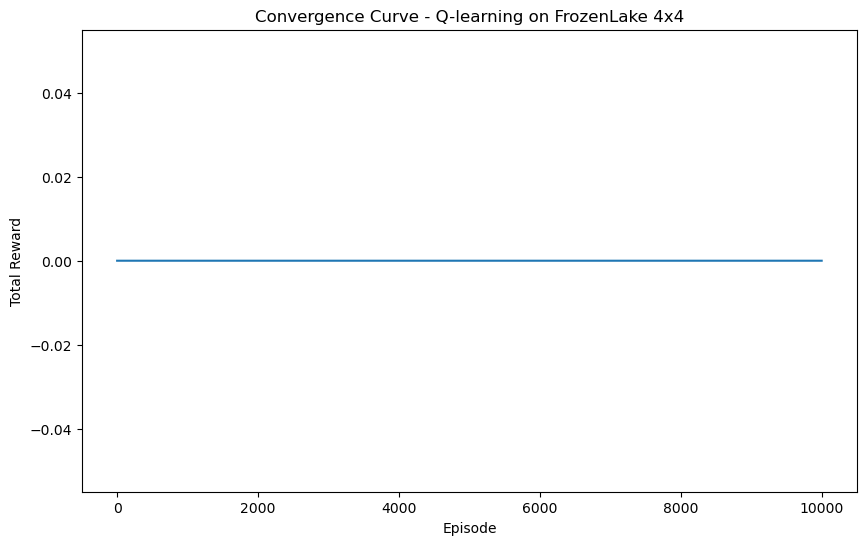

Learned Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Average Reward per Episode:  0.0


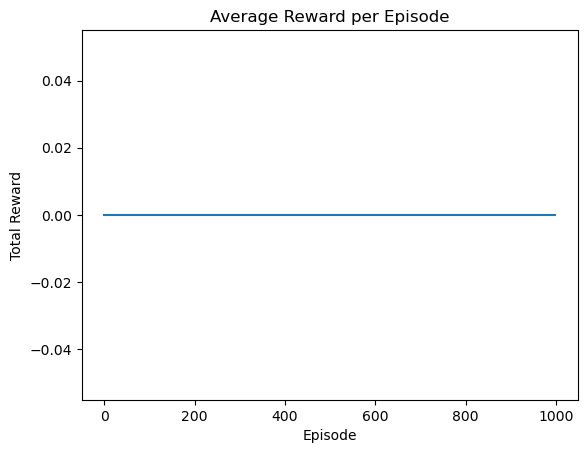

Average Reward per Episode: 0.0


In [5]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')
n_states = env.observation_space.n
n_actions = env.action_space.n

# Set hyperparameters
alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.1 # exploration rate
n_episodes = 10000 # number of episodes
max_steps = 100 # maximum number of steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((n_states, n_actions))

# Lists to store convergence data
episode_rewards = []
episode_lengths = []

# Q-learning algorithm
for episode in range(n_episodes):
    state = env.reset() # reset the environment and get the initial state
    state = state[0]
    episode_reward = 0
    episode_length = 0
    for step in range(max_steps):
        # Choose an action based on epsilon-greedy exploration strategy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # choose a random action
        else:
            action = np.argmax(Q[state]) # choose the action with the highest Q-value

        next_state, reward, done, truncated, _ = env.step(action) # take an action and observe the next state, reward, and done flag

        # Update the Q-value using the Q-learning update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state # update the current state
        episode_reward += reward # accumulate the episode reward
        episode_length += 1 # increment the episode length

        if done:
            break

    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

# Plot the convergence curve
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Convergence Curve - Q-learning on FrozenLake 4x4')
plt.show()

# Print the learned Q-table
print("Learned Q-Table:")
print(Q)

# Evaluate the learned policy
n_eval_episodes = 1000 # number of episodes for evaluation
total_rewards = 0
rewards_per_episode = []
for episode in range(n_eval_episodes):
    state = env.reset()
    state = state[0]
    for step in range(max_steps):
        action = np.argmax(Q[state])
        next_state, reward, done, truncated, _ = env.step(action)
        total_rewards += reward
        state = next_state
        if done:
            break
    rewards_per_episode.append(total_rewards)

# Calculate and print the average reward per episode
avg_reward = total_rewards / n_eval_episodes
print("Average Reward per Episode: ", avg_reward)


avg_rewards_per_episode = np.mean(rewards_per_episode)

# Plot the average reward per episode
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Average Reward per Episode')
plt.show()

# Print the average reward per episode
print('Average Reward per Episode:', avg_rewards_per_episode)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Q-learning algorithm
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.nS, env.nA))
    V_values = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state = next_state
        V_values.append(np.mean(np.max(Q, axis=1)))
    return Q, V_values

# Run Q-learning on a frozen lake environment
import hiive.mdptoolbox.example as example

np.random.seed(0)  # Set random seed for reproducibility

# Create a FrozenLake environment with a 4x4 grid
P, R = example.forest(S=1000)

# Define hyperparameters
num_episodes = 5000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Run Q-learning
Q, V_values = q_learning(P, num_episodes, alpha, gamma, epsilon)

# Plot the mean V values
plt.plot(V_values)
plt.xlabel('Episode')
plt.ylabel('Mean V value')
plt.title('Mean V Values for Q-learning')
plt.show()

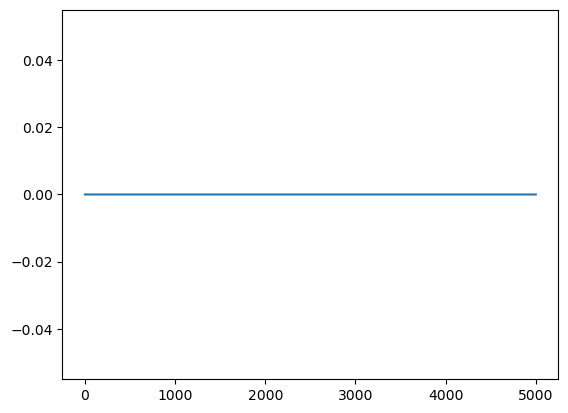

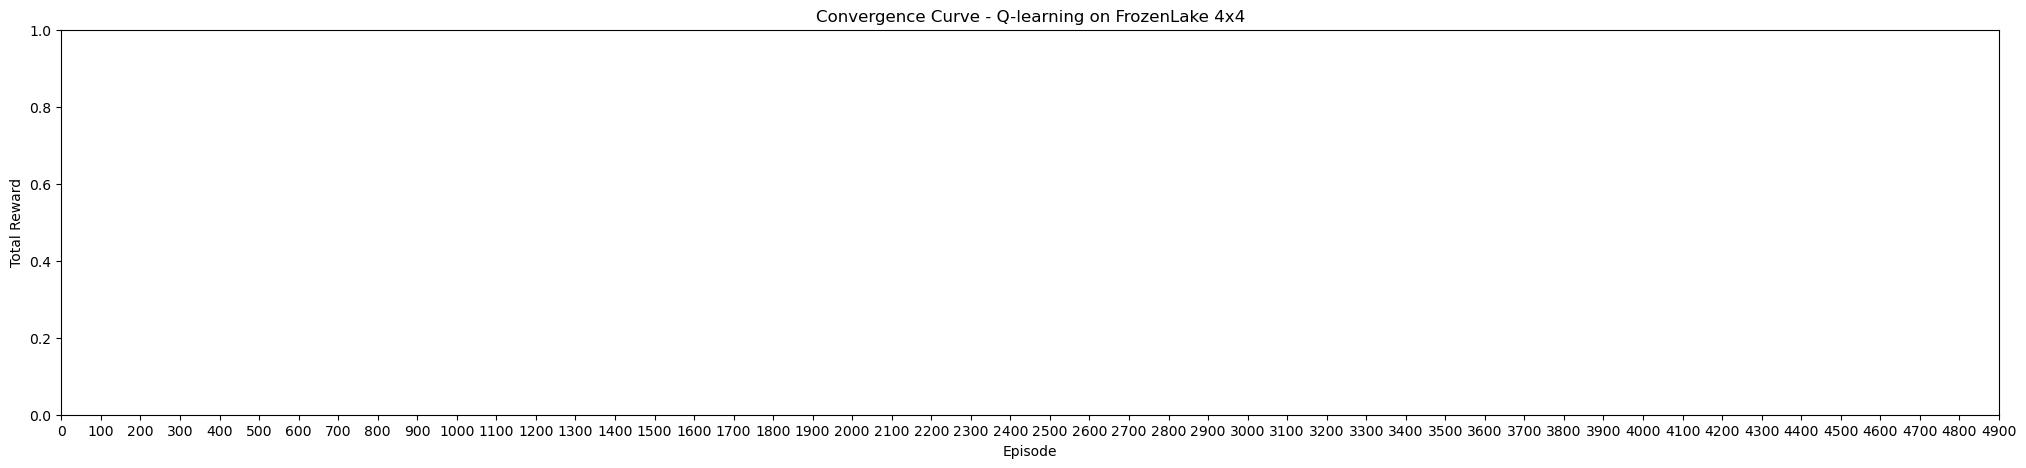

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')
n_states = env.observation_space.n
n_actions = env.action_space.n

# Set hyperparameters
alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.1 # exploration rate
n_episodes = 5000 # number of episodes
max_steps = 100 # maximum number of steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((n_states, n_actions))

# Lists to store convergence data
episode_rewards = []
episode_lengths = []

# Q-learning algorithm
for episode in range(n_episodes):
    state = env.reset() # reset the environment and get the initial state
    state = state[0]
    episode_reward = 0
    episode_length = 0
    for step in range(max_steps):
        # Choose an action based on epsilon-greedy exploration strategy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # choose a random action
        else:
            action = np.argmax(Q[state]) # choose the action with the highest Q-value

        next_state, reward, done, truncated, _ = env.step(action) # take an action and observe the next state, reward, and done flag

        # Update the Q-value using the Q-learning update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state # update the current state
        episode_reward += reward # accumulate the episode reward
        episode_length += 1 # increment the episode length

        if done:
            break

    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

# # Plot the convergence curve
# plt.figure(figsize=(10, 6))
# plt.plot(episode_rewards)
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.title('Convergence Curve - Q-learning on FrozenLake 4x4')
# plt.show()

# Plot the average reward per episode
plt.plot(episode_rewards)
plt.figure(figsize=(25, 5))
plt.xticks(range(0, 5000, 100))
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Convergence Curve - Q-learning on FrozenLake 4x4')
plt.show()

# # Print the learned Q-table
# print("Learned Q-Table:")
# print(Q)

# # Evaluate the learned policy
# n_eval_episodes = 1000 # number of episodes for evaluation
# total_rewards = 0
# rewards_per_episode = []
# for episode in range(n_eval_episodes):
#     state = env.reset()
#     state = state[0]
#     for step in range(max_steps):
#         action = np.argmax(Q[state])
#         next_state, reward, done, truncated, _ = env.step(action)
#         total_rewards += reward
#         state = next_state
#         if done:
#             break
#     rewards_per_episode.append(total_rewards)

# # Calculate and print the average reward per episode
# avg_reward = total_rewards / n_eval_episodes
# print("Average Reward per Episode: ", avg_reward)


# avg_rewards_per_episode = np.mean(rewards_per_episode)

# # Plot the average reward per episode
# plt.plot(rewards_per_episode)
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.title('Average Reward per Episode')
# plt.show()

# # Plot the average reward per episode
# plt.plot(episode_rewards)
# plt.figure(figsize=(25, 5))
# # plt.xticks(range(0, 5000, 100))
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.title('Average Reward per Episode')
# plt.show()

# # Print the average reward per episode
# print('Average Reward per Episode:', avg_rewards_per_episode)

time : 25.264409065246582
time : 50.34702944755554
time : 75.48996257781982
time : 110.18543863296509
time : 140.20384216308594
time : 165.59532761573792
time : 194.8677055835724
time : 220.86338901519775
time : 245.54877495765686


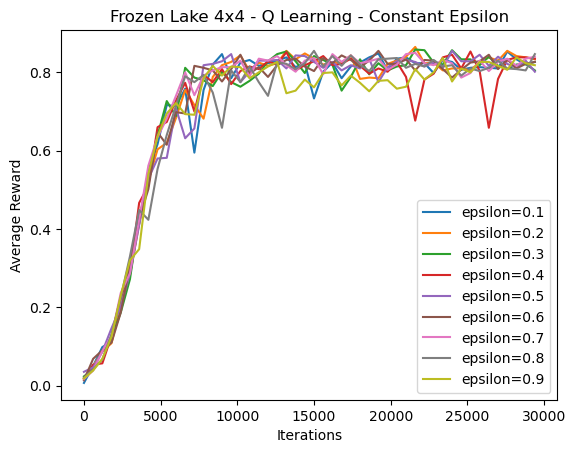

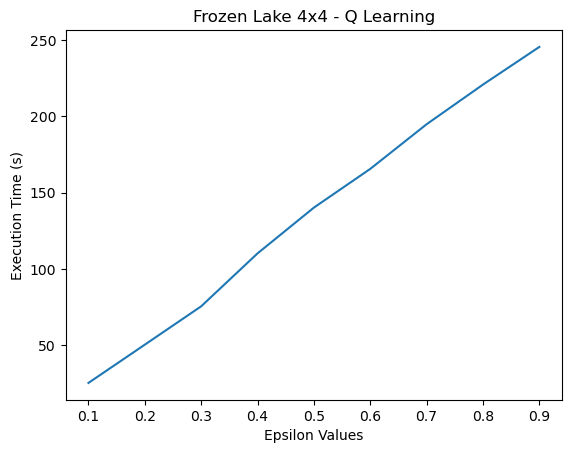

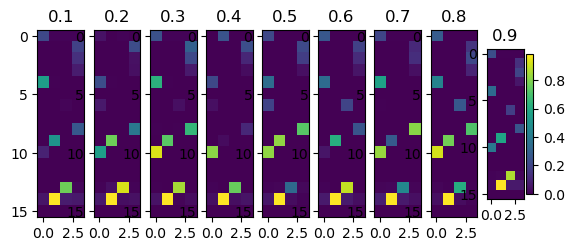

In [2]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
st = time.time()
reward_array = []
iter_array = []
size_array = []
chunks_array = []
averages_array = []
time_array = []
Q_array = []
environment = 'FrozenLake-v1'
env = gym.make(environment, is_slippery=True)
env = env.unwrapped
desc = env.unwrapped.desc

for epsilon in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    iters = []
    optimal=[0]*env.observation_space.n
    alpha = 0.85
    gamma = 0.95
    episodes = 30000
    environment  = 'FrozenLake-v1'
    env = gym.make(environment)
    env = env.unwrapped
    desc = env.unwrapped.desc
    for episode in range(episodes):
        state = env.reset()
        state = state[0]
        done = False
        t_reward = 0
        max_steps = 1000000
        for i in range(max_steps):
            if done:
                break        
            current = state
            if np.random.rand() < (epsilon):
                action = np.argmax(Q[current, :])
            else:
                action = env.action_space.sample()
            
            state, reward, done, truncated, info = env.step(action)
            t_reward += reward
            Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])
        epsilon=(1-2.71**(-episode/1000))
        rewards.append(t_reward)
        iters.append(i)


    for k in range(env.observation_space.n):
        optimal[k]=np.argmax(Q[k, :])

    reward_array.append(rewards)
    iter_array.append(iters)
    Q_array.append(Q)

    env.close()
    end=time.time()
    print("time :",end-st)
    time_array.append(end-st)

    # Plot results
    def chunk_list(l, n):
        for i in range(0, len(l), n):
            yield l[i:i + n]

    size = int(episodes / 50)
    chunks = list(chunk_list(rewards, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]
    size_array.append(size)
    chunks_array.append(chunks)
    averages_array.append(averages)

plt.plot(range(0, len(reward_array[0]), size_array[0]), averages_array[0],label='epsilon=0.1')
plt.plot(range(0, len(reward_array[1]), size_array[1]), averages_array[1],label='epsilon=0.2')
plt.plot(range(0, len(reward_array[2]), size_array[2]), averages_array[2],label='epsilon=0.3')
plt.plot(range(0, len(reward_array[3]), size_array[3]), averages_array[3],label='epsilon=0.4')
plt.plot(range(0, len(reward_array[4]), size_array[4]), averages_array[4],label='epsilon=0.5')
plt.plot(range(0, len(reward_array[5]), size_array[5]), averages_array[5],label='epsilon=0.6')
plt.plot(range(0, len(reward_array[6]), size_array[6]), averages_array[6],label='epsilon=0.7')
plt.plot(range(0, len(reward_array[7]), size_array[7]), averages_array[7],label='epsilon=0.8')
plt.plot(range(0, len(reward_array[8]), size_array[8]), averages_array[8],label='epsilon=0.9')
plt.legend()
plt.xlabel('Iterations')
plt.title('Frozen Lake 4x4 - Q Learning - Constant Epsilon')
plt.ylabel('Average Reward')
plt.show()

plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],time_array)
plt.xlabel('Epsilon Values')
plt.title('Frozen Lake 4x4 - Q Learning')
plt.ylabel('Execution Time (s)')
plt.show()

plt.subplot(1,9,1)
plt.imshow(Q_array[0])
plt.title('0.1')

plt.subplot(1,9,2)
plt.title('0.2')
plt.imshow(Q_array[1])

plt.subplot(1,9,3)
plt.title('0.3')
plt.imshow(Q_array[2])

plt.subplot(1,9,4)
plt.title('0.4')
plt.imshow(Q_array[3])

plt.subplot(1,9,5)
plt.title('0.5')
plt.imshow(Q_array[4])

plt.subplot(1,9,6)
plt.title('0.6')
plt.imshow(Q_array[5])

plt.subplot(1,9,7)
plt.title('0.7')
plt.imshow(Q_array[6])

plt.subplot(1,9,8)
plt.title('0.8')
plt.imshow(Q_array[7])

plt.subplot(1,9,9)
plt.title('0.9')
plt.imshow(Q_array[8])

plt.colorbar()

plt.show()

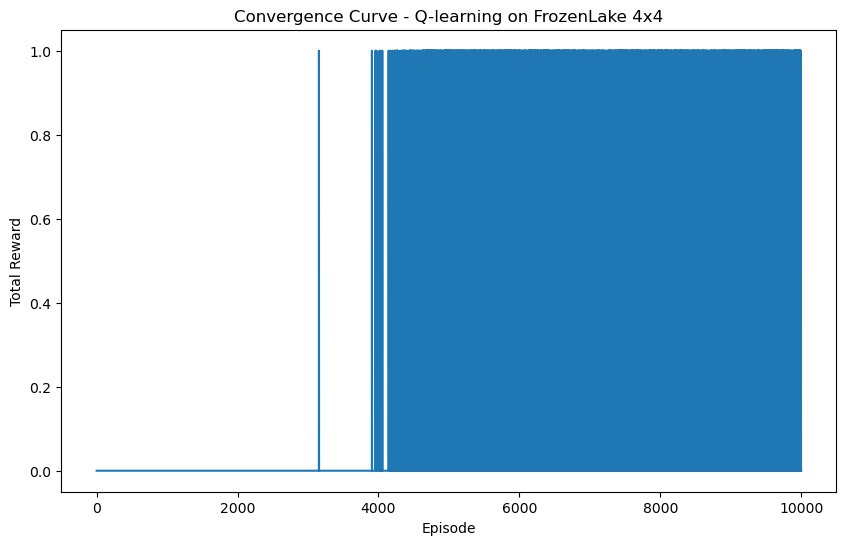

Learned Q-Table:
[[5.19581057e-01 5.12601248e-01 5.12027276e-01 5.13129429e-01]
 [3.68078430e-01 2.01527282e-01 2.84036672e-01 4.74116175e-01]
 [4.24620861e-01 3.22645103e-01 2.92852827e-01 3.17736929e-01]
 [3.19220308e-04 1.79351165e-01 1.97176466e-02 7.47220995e-02]
 [5.28527301e-01 3.91773470e-01 4.02841907e-01 4.38298888e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.93324298e-01 1.69928993e-01 2.63316395e-01 8.32069172e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.06645386e-01 3.76333820e-01 3.42995044e-01 5.86616497e-01]
 [5.04346247e-01 6.39011514e-01 4.73266390e-01 4.91779007e-01]
 [6.42264204e-01 3.75154216e-01 3.05105761e-01 3.96223150e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.63981562e-01 5.27475785e-01 7.28166478e-01 4.48772673e-01]
 [7.57500841e-01 8.86941834e-01 8.23705773e-01 7.87410508e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

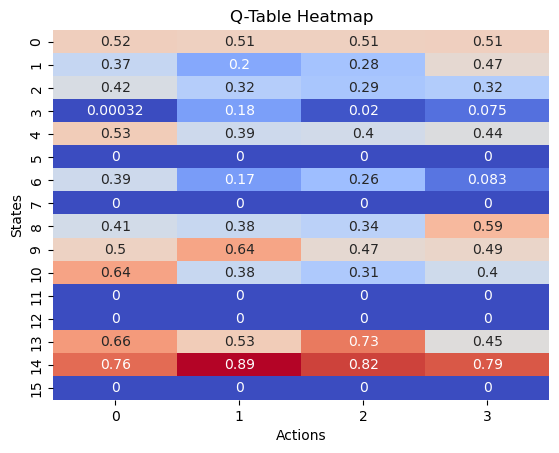

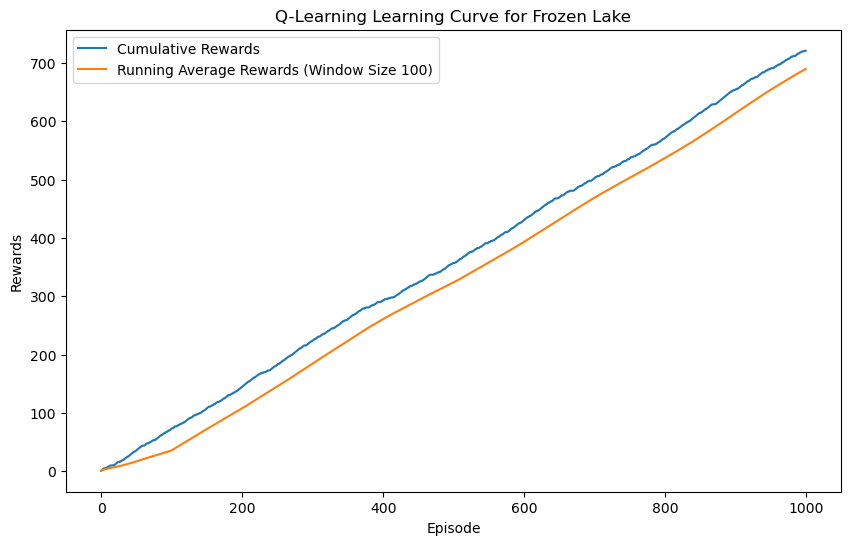

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')
n_states = env.observation_space.n
n_actions = env.action_space.n

# Set hyperparameters
alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.1 # exploration rate
n_episodes = 10000 # number of episodes
max_steps = 100 # maximum number of steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((n_states, n_actions))

# Lists to store convergence data
episode_rewards = []
episode_lengths = []

# Q-learning algorithm
for episode in range(n_episodes):
    state = env.reset() # reset the environment and get the initial state
    state = state[0]
    episode_reward = 0
    episode_length = 0
    for step in range(max_steps):
        # Choose an action based on epsilon-greedy exploration strategy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # choose a random action
        else:
            action = np.argmax(Q[state]) # choose the action with the highest Q-value

        next_state, reward, done, truncated, _ = env.step(action) # take an action and observe the next state, reward, and done flag

        # Update the Q-value using the Q-learning update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state # update the current state
        episode_reward += reward # accumulate the episode reward
        episode_length += 1 # increment the episode length

        if done:
            break

    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

# Plot the convergence curve
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Convergence Curve - Q-learning on FrozenLake 4x4')
plt.show()

# Print the learned Q-table
print("Learned Q-Table:")
print(Q)

sns.heatmap(Q, cmap='coolwarm', annot=True, cbar=False)
plt.xlabel('Actions')
plt.ylabel('States')
plt.title('Q-Table Heatmap')
plt.show()

# Evaluate the learned policy
n_eval_episodes = 1000 # number of episodes for evaluation
total_rewards = 0
rewards_per_episode = []
for episode in range(n_eval_episodes):
    state = env.reset()
    state = state[0]
    for step in range(max_steps):
        action = np.argmax(Q[state])
        next_state, reward, done, truncated, _ = env.step(action)
        total_rewards += reward
        state = next_state
        if done:
            break
    rewards_per_episode.append(total_rewards)

# Assume you have a list or array of cumulative rewards or episode lengths
# for each training episode
cumulative_rewards = rewards_per_episode  # Replace with your actual data

# Calculate the running average of cumulative rewards
running_average_rewards = []
window_size = 100  # Choose an appropriate window size for smoothing
for i in range(len(cumulative_rewards)):
    if i < window_size:
        running_average_rewards.append(sum(cumulative_rewards[:i+1]) / (i + 1))
    else:
        running_average_rewards.append(sum(cumulative_rewards[i-window_size+1:i+1]) / window_size)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label='Cumulative Rewards')
plt.plot(running_average_rewards, label='Running Average Rewards (Window Size {})'.format(window_size))
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('Q-Learning Learning Curve for Frozen Lake')
plt.legend()
plt.show()

Episode: 0, Iteration Count: 1
Episode: 1, Iteration Count: 2
Episode: 2, Iteration Count: 3
Episode: 3, Iteration Count: 4
Episode: 4, Iteration Count: 5
Episode: 5, Iteration Count: 6
Episode: 6, Iteration Count: 7
Episode: 7, Iteration Count: 8
Episode: 8, Iteration Count: 9
Episode: 9, Iteration Count: 10
Episode: 10, Iteration Count: 11
Episode: 11, Iteration Count: 12
Episode: 12, Iteration Count: 13
Episode: 13, Iteration Count: 14
Episode: 14, Iteration Count: 15
Episode: 15, Iteration Count: 16
Episode: 16, Iteration Count: 17
Episode: 17, Iteration Count: 18
Episode: 18, Iteration Count: 19
Episode: 19, Iteration Count: 20
Episode: 20, Iteration Count: 21
Episode: 21, Iteration Count: 22
Episode: 22, Iteration Count: 23
Episode: 23, Iteration Count: 24
Episode: 24, Iteration Count: 25
Episode: 25, Iteration Count: 26
Episode: 26, Iteration Count: 27
Episode: 27, Iteration Count: 28
Episode: 28, Iteration Count: 29
Episode: 29, Iteration Count: 30
Episode: 30, Iteration Count:

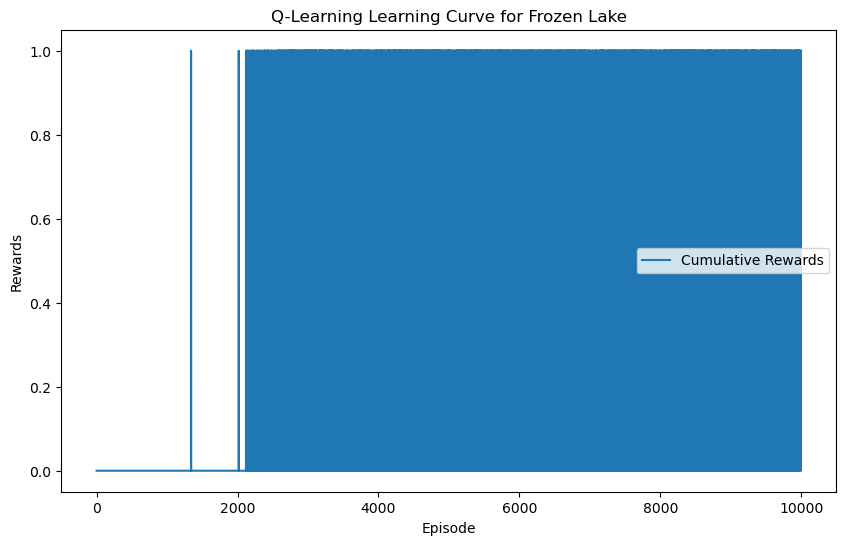

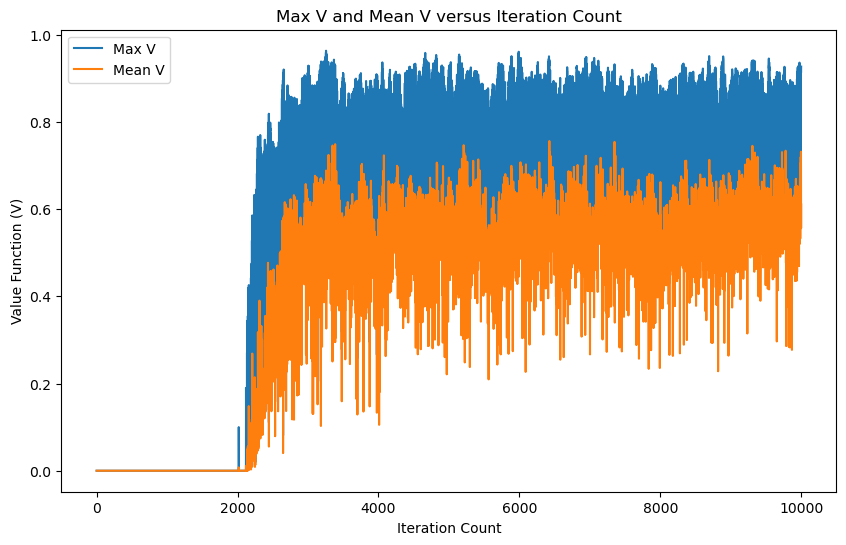

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Define the Q-learning algorithm
def q_learning(env, alpha=0.1, gamma=0.99, epsilon=0.1, num_episodes=10000):
    """
    Q-learning algorithm.
    """
    # Initialize Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Initialize lists to store learning progress
    cumulative_rewards = []
    max_v = []
    mean_v = []

    # Q-learning loop
    for episode in range(num_episodes):
        state = env.reset()
        state = state[0]
        done = False
        cumulative_reward = 0
        v_values = []
        while not done:
            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            # Take action and observe next state and reward
            next_state, reward, done, trucnated,_ = env.step(action)

            # Update Q-value for current state-action pair
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            # Update current state and cumulative reward
            state = next_state
            cumulative_reward += reward

            # Compute value function for current state
            v_values.append(np.max(Q[state]))

        # Store cumulative reward, max V, and mean V for this episode
        cumulative_rewards.append(cumulative_reward)
        max_v.append(np.max(v_values))
        mean_v.append(np.mean(v_values))

        print("Episode: {}, Iteration Count: {}".format(episode, len(cumulative_rewards)))


    return cumulative_rewards, max_v, mean_v

# Create Frozen Lake environment
env = gym.make('FrozenLake-v1')

# Run Q-learning algorithm
cumulative_rewards, max_v, mean_v = q_learning(env)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label='Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('Q-Learning Learning Curve for Frozen Lake')
plt.legend()
plt.show()

# Plot the maximum and mean values of V versus iteration count
plt.figure(figsize=(10, 6))
plt.plot(max_v, label='Max V')
plt.plot(mean_v, label='Mean V')
plt.xlabel('Iteration Count')
plt.ylabel('Value Function (V)')
plt.title('Max V and Mean V versus Iteration Count')
plt.legend()
plt.show()

In [ ]:
x = [
 [0.53356803, 0.52827974, 0.49269579, 0.50672627],
 [0.30494081 0.36672572 0.34669746 0.41316537],
 [0.36149832 0.32941408 0.29267507 0.31928761],
 [0.15416207 0.01074624 0.03320271 0.        ],
 [0.55564286 0.50252494 0.26212205 0.30255759],
 [0.         0.         0.         0.        ],
 [0.35490506 0.08222612 0.2350877  0.06920013],
 [0.         0.         0.         0.        ],
 [0.42943931 0.39762948 0.44900424 0.58383793],
 [0.47445197 0.6215069  0.54520554 0.39644711],
 [0.57231036 0.46501252 0.30476135 0.25077906],
 [0.         0.         0.         0.        ],
 [0.         0.         0.         0.        ],
 [0.51439218 0.54865641 0.73354237 0.33121362],
 [0.78226631 0.84290447 0.77062632 0.76349829],
 [0.         0.         0.         0.        ]]
